Везьменова Ксения
4 вариант

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def outlier_indexes(data: pd.DataFrame):
    cols = data.columns
    indexes = pd.Index([], dtype= 'int64')
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        index = data.index[(data[col] > upper_bound) | (data[col] < lower_bound)]
        indexes = indexes.union(index)
    return indexes

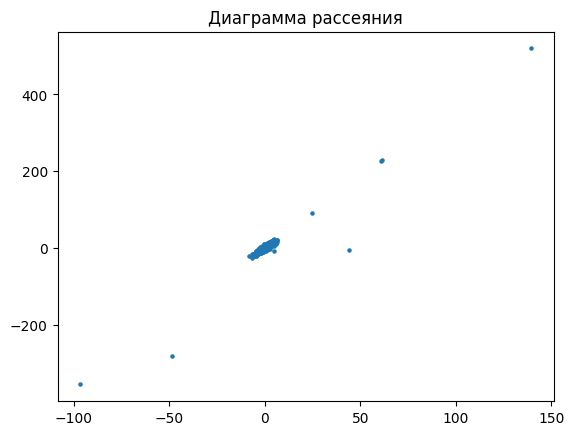

In [2]:
#1 - Выбрать данные в соответствии с вариантом и построить диаграмму рассеяния

data = pd.read_excel('Семинар 7.xlsx', sheet_name = 4, usecols = [1, 2])

plt.scatter(data[0], data[1], s = 5)
plt.title('Диаграмма рассеяния')
plt.show()

In [3]:
#2 - Удалить строки, содержащие пропуски или выбросы в столбцах x или y. Вывести список координат точек, признанных выбросами на этом шаге.

data.dropna(inplace= True)
out_indexes = outlier_indexes(data)

print(f"Выбросы изначальных данных \n {data.iloc[out_indexes]}")
data.drop(out_indexes, inplace = True)

Выбросы изначальных данных 
              0           1
35    6.202313   19.971058
71  -48.601857 -280.928375
201   6.114605   14.640345
263  -5.920449  -21.001494
280  -3.291042  -10.414606
334  61.656113  229.279359
337   1.029887    3.602856
363  -0.442351   -7.898198
377   0.487932    4.847961
460   1.763874   10.989612
586   0.838114    6.717852
720 -96.659109 -356.101004
724  -0.157042    0.486574
731  -5.006549  -13.566498
754   0.461961   -7.481523
770   1.740850   -1.905384
781  -0.410583   -1.839374
814   2.351764    2.565881
820  -0.009786   -3.557132
878   1.882503   11.613428
910   0.696642   -4.056875
945   2.472890    9.884908


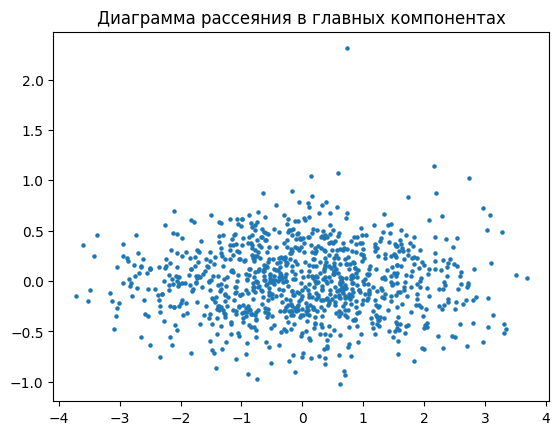

In [4]:
#3 - Построить диаграмму рассеяния в координатах главных компонент.

sc = StandardScaler()
sc.fit(data.astype('float64'))
Xsc = sc.transform(data.astype('float64'))
Xsc = pd.DataFrame(Xsc, index = data.index, columns = data.columns)


mean = np.mean(Xsc.values, axis = 0)
cov = (Xsc - mean).T.dot((Xsc - mean) / (Xsc.shape[0] - 1))

eig_vals, eig_vecs = np.linalg.eig(cov)


u, s, v = np.linalg.svd(cov)

skpcamod = PCA().fit(X = Xsc)

scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:,:2])
scores_skl.columns = ['PC1','PC2']
plt.scatter(data = scores_skl, x = 'PC1', y = 'PC2', s = 5)
plt.title('Диаграмма рассеяния в главных компонентах')
plt.show()

In [5]:
#4 - Удалить строки, содержащие пропуски или выбросы в столбцах x или y. Вывести список координат точек, признанных выбросами на этом шаге.

out_indexes = outlier_indexes(Xsc)
print(f"Выбросы шкалированных данных \n {Xsc.iloc[out_indexes]}")
data.drop(out_indexes, inplace = True)

Выбросы шкалированных данных 
             0         1
236  1.199906  0.849869
257 -0.541783 -1.354460
340 -1.962446 -1.067803
379 -1.684491 -1.861935
466  1.903453  1.689916
768  0.989362  1.180837
923 -0.323687 -0.421193


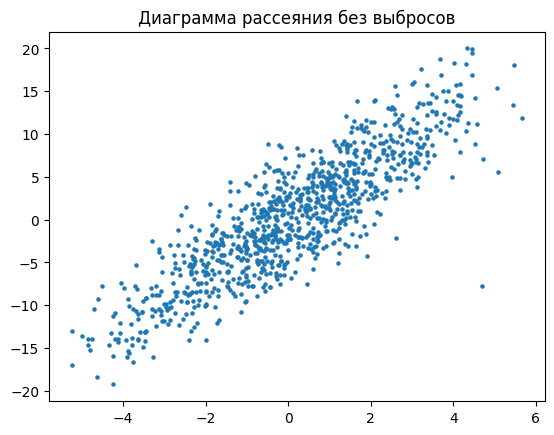

In [6]:
#5 - Построить диаграмму рассеяния по исходным данным с удаленными выбросами.

plt.scatter(data[0], data[1], s = 5)
plt.title('Диаграмма рассеяния без выбросов')
plt.show()

In [7]:
#6 - Для исходных данных с удаленными выбросами найти выборочные средние, стандартные отклонения, коэффициенты корреляции Пирсона и Спирмена и их пи-значения для гипотезы о независимости.

print(f'Среднее х = {round(data[0].mean(), 4)}, среднее y = {round(data[1].mean(),4)}')
print(f'Стандартное отклонение x = {round(data[0].std(), 4)}, стандартное отклонение y = {round(data[1].std(), 4)}')
print(f'Коэффициент корреляции Пирсона = {stats.pearsonr(data[0], data[1])[0]}, pi-значение = {stats.pearsonr(data[0], data[1])[1]}')
print(f'Коэффициент корреляции Спирмена = {stats.spearmanr(data[0], data[1])[0]}, pi-значение = {stats.spearmanr(data[0], data[1])[1]}')

Среднее х = 0.1151, среднее y = 0.3503
Стандартное отклонение x = 2.0801, стандартное отклонение y = 7.1561
Коэффициент корреляции Пирсона = 0.8699733853736441, pi-значение = 1.4160212318576343e-298
Коэффициент корреляции Спирмена = 0.8602758782760093, pi-значение = 1.3781202522224704e-284
